In [3]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision 
import pathlib
from pathlib import Path

$\Large\text{Data load}$

In [82]:
path_folder = 'TOP4040/'

In [83]:
folder = Path(path_folder)

In [84]:
data = np.load(path_folder + '3.npz')['arr_0']

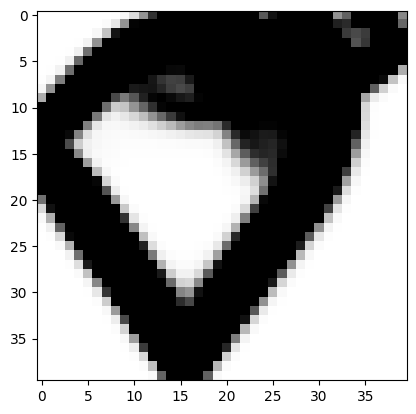

In [92]:
plt.imshow(data[6], cmap='Greys')

$\Large\text{Examples of tensor usage}$

In [84]:
x = torch.rand(6,6)
x

tensor([[0.3235, 0.2373, 0.3899, 0.9566, 0.8621, 0.5881],
        [0.0527, 0.4767, 0.0014, 0.5825, 0.1796, 0.8955],
        [0.2290, 0.8728, 0.5346, 0.6704, 0.2093, 0.2219],
        [0.2280, 0.2104, 0.0355, 0.0975, 0.7820, 0.1833],
        [0.3402, 0.3883, 0.7353, 0.0828, 0.2805, 0.3539],
        [0.5667, 0.0642, 0.5070, 0.4360, 0.3403, 0.9218]])

In [85]:
x.view(36)

tensor([0.3235, 0.2373, 0.3899, 0.9566, 0.8621, 0.5881, 0.0527, 0.4767, 0.0014,
        0.5825, 0.1796, 0.8955, 0.2290, 0.8728, 0.5346, 0.6704, 0.2093, 0.2219,
        0.2280, 0.2104, 0.0355, 0.0975, 0.7820, 0.1833, 0.3402, 0.3883, 0.7353,
        0.0828, 0.2805, 0.3539, 0.5667, 0.0642, 0.5070, 0.4360, 0.3403, 0.9218])

In [ ]:
x.view(3,12)

In [ ]:
x.view(-1, 12) # -1 , python automatically calculate the size

In [ ]:
a = torch.ones(5)
a

In [ ]:
b = a.numpy() #have to write copy(), otherwise they are stored at the same memory
b

In [ ]:
c = a.numpy().copy() #have to write copy(), otherwise they are stored at the same memory and whenever you change the value in a it is also changed in b
c

In [ ]:
a.add_(5)
a

In [ ]:
b

In [ ]:
c

In [ ]:
x = torch.ones(5, requires_grad = True)
x # it says to tensor that later it requires to calculate the gradients for this tensor in optimization steps

In [ ]:
type(x[0].item())

$\Large\text{Gradient calculation with autograd}$

In [ ]:
x = torch.randn(3, requires_grad = True)
x

In [ ]:
y = x + 2
y

In [ ]:
z = y**2*2
# z = z.mean()

In [ ]:
# z.backward() #dz/dx
# print(x.grad)

In [ ]:
# What if we dont specify z = z.mean()
v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float32)
z.backward(v) # in the backward it is vector jacobian product
print(x.grad) 

In [ ]:
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():

In [ ]:
x.requires_grad_(False) # Whenever our function has _ at the end it means that is modified our variable inplace
x # Now x does not have requires_grad=True
# The same will be with y = x.detach()
# with torch.no_grad():
#    y = x + 2 

$\text{Whenever we call backward function then the gradient for this tensor will be accumulated into the dot grad attribute, the values will be summed up}$ 

In [ ]:
weights = torch.ones(4 , requires_grad=True)

$\text{Before we do the next iteration or optimiztion we must empty the gradients}$

In [ ]:
for epoch in range(4):
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)
    
    weights.grad.zero_() # Empty 

In [ ]:
#With optimization

# optimizer = torch.optim.SGD(weights, lr=0.01)
# optimizer.step()
# optimizer.zero_grad()

$\Large\text{Backpropagation}$

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0,requires_grad = True)


In [ ]:
#forward pass and compute the loss

In [ ]:
y_hat = w*x
loss = (y_hat- y) **2
loss

In [ ]:
# Backward pass
loss.backward()
w.grad

$\text{Next we have to update our weights and next forward and backkward}$

$\Large\text{Gradient Descent with Autograd and Backpropagation}$

$\text{Manually}$

In [ ]:
def forward(x):
    
    return w * x

In [ ]:
def loss(y, y_pred):
    
    return ((y - y_pred)**2).mean()

In [ ]:
#MSE = 1/N * (w*x - y)**2
#dJ/dw = 1/N 2x (w*x - y)

def gradient(x,y, y_pred):
    
    return np.dot(2*x, y_pred - y).mean()

In [ ]:
gradient(np.array([1,2,3]), np.array([2,4,8]), np.array([2,4,10]))

In [ ]:
loss(np.array([2,4,8]), np.array([2,4,10]))

In [ ]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

In [ ]:
learning_rate = 0.01
n_iters = 10

In [ ]:
X = np.array(list(range(1,5)), dtype = np.float32)
Y = X.copy()*2
w = 0.0

for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = forward(X)
    
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    dw = gradient(X,Y, y_pred)
    
    #update weights
    
    w = w - learning_rate*dw
    
    if epoch%1 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}, dw = {dw}')
        


In [ ]:
print(f'Prediction after training: f(5) = {forward(5):.3f}')

$\text{Gradients computation with Autograd}$

In [ ]:
X = torch.tensor(list(range(1,5)), dtype = torch.float32)
Y = X*2
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)
n_iters = 20
for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = forward(X)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    l.backward() # dl/dw
    
    #update weights
    with torch.no_grad(): 
        w-= w.grad*learning_rate
    # zero gradients
    w.grad.zero_()
    if epoch%2 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}, dw = {dw}')
        
print(f'Prediction before training: f(5) = {forward(5):.3f}')

$\text{Examples from the videos}$

In [ ]:
zero = np.zeros((7,7), dtype = np.int32)

zero[1:-1, 2::3] = 1
zero[1:-1:4, 2:-1] = 1


plt.imshow(zero , cmap = 'Greys')

In [ ]:
one = np.zeros((7,7), dtype = np.int32)
one[1:-1,3] = 1
plt.imshow(one , cmap = 'Greys')

In [ ]:
two = np.zeros((7,7), dtype = np.int32)

two[1:-1, 2] = 1
two[1:-1:2, 2:-1] = 1
two[2, 2] = 0
two[2, -2] = 1



plt.imshow(two , cmap = 'Greys')

In [ ]:
three = np.zeros((7,7), dtype = np.int32)

three[1:-1, -2] = 1
three[1:-1:2, 1:-2] = 1

plt.imshow(three , cmap = 'Greys')

In [ ]:
four = np.zeros((7,7), dtype = np.int32)

four[1:4, 2:-1:3] = 1
four[3, 2:-1] = 1
four[3 :-1, -2] = 1
# four[1:-1:2, 1:-2] = 1

plt.imshow(four , cmap = 'Greys')

In [ ]:
five = np.zeros((7,7), dtype = np.int32)

five[1:-1, 2] = 1
five[1:-1:2, 2:-1] = 1
five[-3, -2] = 1
five[-3, 2] = 0


plt.imshow(five , cmap = 'Greys')

In [ ]:
six = np.zeros((7,7), dtype = np.int32)

six[1:-1, 2] = 1
six[1:-1:2, 2:-1] = 1
six[-3, -2] = 1

# four[1:-1:2, 1:-2] = 1

plt.imshow(six , cmap = 'Greys')

In [ ]:
sev = np.zeros((7,7), dtype = np.int32)

sev[1:-1, -3] = 1
sev[1, 2:-3] = 1

# four[1:-1:2, 1:-2] = 1

plt.imshow(sev , cmap = 'Greys')

In [ ]:
eig = np.zeros((7,7), dtype = np.int32)

eig[1:-1, 2::3] = 1
eig[1:-1:2, 2:-1] = 1


plt.imshow(eig , cmap = 'Greys')

In [ ]:
nine = np.zeros((7,7), dtype = np.int32)

nine[1:-1, 2] = 1
nine[1:-1:2, 2:-1] = 1
nine[-3, -2] = 1
nine[-3, 2] = 0
nine[2, -2] = 1

plt.imshow(nine , cmap = 'Greys')

In [ ]:
import random

In [ ]:
def relu(t):
    return np.maximum(t,0)

def softmax(t):
    
    out = np.exp(t)
    return out/np.sum(out)

def sparse_cross_entropy(z,y):
    return -np.log(z[0,y])


def relu_deriv(t):
    
    return (t >= 0).astype(float)

def predict(x):
    if x.shape[0] != 1:
        x = x.reshape(1,-1)
    t1 = np.dot(x, W1) + b1
    h1 = relu(t1)
    t2 = h1 @ W2 + b2
    z = softmax(t2)
    return z

def cals_accuracy(cur_set):
    correct = 0
    
    for x,y in cur_set:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(cur_set)
    return acc

def to_full(y, num_classes):
    y_full = np.zeros((1,num_classes))
    
    y_full[0,y] = 1
    
    return y_full

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(iris.get('target').shape)
print(iris.data[0].shape)
print(iris.data[0][None, ...].shape) # [None, ...] from (4,) to (1, 4 ) 

In [ ]:
dataset = [(iris.data[i].reshape(1,-1), iris.target[i]) for i in range(len(iris.target))]
dataset[:5]

In [ ]:
input_dim = 4
out_dim = 3
h_dim = 5
epoch = 100
batch_size = 50 # Hyperparameter

W1 = np.random.randn(input_dim, h_dim)
b1 = np.random.randn(1, h_dim)
W2 = np.random.rand(h_dim, out_dim)
b2 = np.random.randn(1, out_dim)

# new initial values

W1 = (W1 - 0.5)*2 * np.sqrt(1/input_dim)
b1 = (b1 - 0.5)*2 * np.sqrt(1/input_dim)
W2 = (W2 - 0.5)*2 * np.sqrt(1/h_dim)
b2 = (b2 - 0.5)*2 * np.sqrt(1/h_dim)

In [ ]:
loss_arr = []
acc = []
for ep in range(epoch):
    
    random.shuffle(dataset)
    for i in range(len(dataset)):

        x,y = dataset[i]
        #Forward 

        t1 = np.dot(x, W1) + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax(t2)

        E = sparse_cross_entropy(z,y)

        #Backward

        y_full = to_full(y, out_dim)
        dE_dt2 = z - y_full 
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = dE_dt2
        dE_dh1 = dE_dt2 @W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = dE_dt1

        alpha = 0.001

        # update 

        W1 = W1 - alpha * dE_dW1
        b1 = b1 - alpha * dE_db1
        W2 = W2 - alpha * dE_dW2
        b2 = b2 - alpha * dE_db2
        
        loss_arr.append(E)
#         acc.append(cals_accuracy(dataset))

In [ ]:
plt.plot(loss_arr)

In [ ]:
def softmax_batch(t):
    
    out = np.exp(t)
    return out/np.sum(out, axis = 1, keepdims = True)

In [ ]:
def sparse_cross_entropy_batch(z,y):
    
    return - np.log(np.array([z[j, y[j]] for j in range(len(y))]))

In [ ]:
def to_full_batch(y, num_classes):
    y_full = np.zeros((len(y), num_classes))
    
    for j, yj in enumerate(y):
        y_full[j,yj] = 1
        
    return y_full

In [ ]:
loss_arr = []
arr = []
for ep in range(500):
    
    random.shuffle(dataset)
    for i in range(len(dataset) // batch_size):
        
        batch_x, batch_y = zip(*dataset[i*batch_size: (i+1)*batch_size])
        x = np.concatenate(batch_x, axis = 0)
        y = np.array(batch_y)
        #Forward 

        t1 = np.dot(x, W1) + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax_batch(t2)

        E = np.sum(sparse_cross_entropy_batch(z,y))

        #Backward

        y_full = to_full_batch(y, out_dim)
        
        dE_dt2 = z - y_full 
        dE_dW2 = h1.T @ dE_dt2
        
        dE_db2 = np.sum(dE_dt2, axis = 0, keepdims = True)
        dE_dh1 = dE_dt2 @W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis = 0, keepdims = True)

        alpha = 0.001

        # update 

        W1 = W1 - alpha * dE_dW1
        b1 = b1 - alpha * dE_db1
        W2 = W2 - alpha * dE_dW2
        b2 = b2 - alpha * dE_db2
        
        loss_arr.append(E)
        acc.append(cals_accuracy(dataset))

In [ ]:
plt.plot(acc)

In [ ]:
plt.plot(loss_arr)

In [ ]:
acc[-1]

In [ ]:
curr0 = np.zeros(10, dtype = np.int32)
curr1 = np.zeros(10, dtype = np.int32)
curr2 = np.zeros(10, dtype = np.int32)
curr3 = np.zeros(10, dtype = np.int32)
curr4 = np.zeros(10, dtype = np.int32)
curr5 = np.zeros(10, dtype = np.int32)
curr6 = np.zeros(10, dtype = np.int32)
curr7 = np.zeros(10, dtype = np.int32)
curr8 = np.zeros(10, dtype = np.int32)
curr9 = np.zeros(10, dtype = np.int32)

curr0[0] = 1
curr1[1] = 1
curr2[2] = 1
curr3[3] = 1
curr4[4] = 1
curr5[5] = 1
curr6[6] = 1
curr7[7] = 1
curr8[8] = 1
curr9[9] = 1

In [ ]:
digits = {
    0:[zero, curr0],
    1:[one,curr1],
    2:[two,curr2],
    3:[three,curr3],
    4:[four,curr4],
    5:[five,curr5],
    6:[six,curr6],
    7:[sev,curr7],
    8:[eig,curr8],
    9:[nine,curr9]}

In [ ]:
np.maximum([1,-2,3], 0)

In [ ]:
input_dim = 49

h_dim = 10

out_dim = 10

In [ ]:
dts = list(digits.values())

In [ ]:
input_dim = 49
h_dim = 20
out_dim = 10
W1 = np.random.randn(input_dim, h_dim)
b1 = np.random.randn(1, h_dim)
W2 = np.random.rand(h_dim, out_dim)
b2 = np.random.randn(1, out_dim)

In [ ]:
loss_arr = []
arr = []
for ep in range(epoch):
    
    random.shuffle(dts)
    for i in range(len(dts)):

        x,y = dts[i]
        x = x.ravel().reshape(1,-1).copy()
        y = y.reshape(1,-1).copy()
        #Forward 

        t1 = np.dot(x, W1) + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax(t2)

        E = sparse_cross_entropy(z,np.argmax(y))

        #Backward

        y_full = y.copy()
        dE_dt2 = z - y_full 
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = dE_dt2
        dE_dh1 = dE_dt2 @W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = dE_dt1

        alpha = 0.001

        # update 

        W1 = W1 - alpha * dE_dW1
        b1 = b1 - alpha * dE_db1
        W2 = W2 - alpha * dE_dW2
        b2 = b2 - alpha * dE_db2
        
        loss_arr.append(E)
        y = np.argmax(y)
#         acc.append(cals_accuracy(dts))

In [ ]:
num = 3
plt.imshow(dts[num][0], cmap = 'binary')
print(f'Predicted value - {np.argmax(predict(dts[num][0]))}')

$\text{Gradiens computation: Autograd, Loss computation: PyTorch Loss, Parameter updates: PyTorch Optimizer}$

In [ ]:
# 1) Design model (input size, output size, forward pass )
# 2) Construct loss and optimizer
# 3) Training loop

# - forward pass: compute prediction
# - backward pass: gradients
# - update weights


In [2]:
import torch.nn as nn

In [3]:
def forward(x):
    
    return w * x

In [7]:
X = torch.tensor(list(range(1,5)), dtype = torch.float32)
Y = torch.tensor(list(range(1,5)), dtype = torch.float32)*2
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)
n_iters = 100
learning_rate = 0.01

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = learning_rate)

for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = forward(X)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    l.backward() # dl/dw
    
    #update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    if epoch%10 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {forward(5):.3f}')

epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction before training: f(5) = 10.000


In [44]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
n_iters = 1000
learning_rate = 0.01

n_samples, n_feature = X.shape

input_size = n_feature
output_size = n_feature

X_test = torch.tensor([5], dtype = torch.float32)

model = nn.Linear(input_size, output_size)
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Prediction before training: f(5) = -2.396


In [45]:
for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = model(X)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    l.backward() # dl/dw
    
    #update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    if epoch%100 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

epoch 0: w = -0.094, loss = 46.41172028
epoch 100: w = 1.825, loss = 0.04440691
epoch 200: w = 1.870, loss = 0.02437883
epoch 300: w = 1.904, loss = 0.01338367
epoch 400: w = 1.929, loss = 0.00734748
epoch 500: w = 1.947, loss = 0.00403367
epoch 600: w = 1.961, loss = 0.00221444
epoch 700: w = 1.971, loss = 0.00121571
epoch 800: w = 1.979, loss = 0.00066740
epoch 900: w = 1.984, loss = 0.00036640
Prediction before training: f(5) = 9.976


$\text{Let's write our own model}$

In [46]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, out_dim):
        super().__init__()
        #define layers
        
        self.lin = nn.Linear(input_dim, out_dim)
        
    def forward(self, x):
        
        return self.lin(x)


In [47]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
n_iters = 1000
learning_rate = 0.01

n_samples, n_feature = X.shape

input_size = n_feature
output_size = n_feature

X_test = torch.tensor([5], dtype = torch.float32)

# model = nn.Linear(input_size, output_size)
model = LinearRegression(input_size, output_size)
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Prediction before training: f(5) = -2.991


In [48]:
for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = model(X)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    l.backward() # dl/dw
    
    #update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    if epoch%100 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

epoch 0: w = -0.241, loss = 49.87801361
epoch 100: w = 1.766, loss = 0.07958636
epoch 200: w = 1.827, loss = 0.04369196
epoch 300: w = 1.871, loss = 0.02398637
epoch 400: w = 1.905, loss = 0.01316821
epoch 500: w = 1.929, loss = 0.00722919
epoch 600: w = 1.948, loss = 0.00396873
epoch 700: w = 1.961, loss = 0.00217879
epoch 800: w = 1.971, loss = 0.00119612
epoch 900: w = 1.979, loss = 0.00065665
Prediction before training: f(5) = 9.967


In [50]:
from sklearn import datasets

In [53]:
#0) prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1) #reshape tensor

n_samples, n_features = X.shape

In [54]:
#1) Model

input_size = n_features
output_size = 1 # We want to have one value for each sample that we want to put in
model = nn.Linear(input_size, output_size)

In [57]:
#2)Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epoch: 10, loss = 502.1649
epoch: 20, loss = 456.3393
epoch: 30, loss = 422.9299
epoch: 40, loss = 398.5614
epoch: 50, loss = 380.7797
epoch: 60, loss = 367.7990
epoch: 70, loss = 358.3199
epoch: 80, loss = 351.3958
epoch: 90, loss = 346.3363
epoch: 100, loss = 342.6384


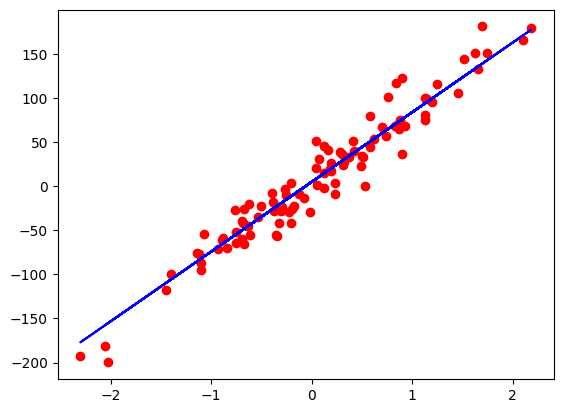

In [60]:
#3) training loop

n_epochs = 100

for ep in range(n_epochs):
    
    #forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    #backward 
    
    loss.backward()
    
    #update
    
    optimizer.step() #update the weights
    
    optimizer.zero_grad()
    
    if (ep+1) % 10 == 0:
        
        print(f'epoch: {ep+1}, loss = {loss.item():.4f}')

predicted = model(X).detach().numpy()  # detach() generate new tensor where our attribute required_grad is false
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [80]:
#0) prepare data

bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

# scale 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)



569 30


In [81]:
#1) Model
# f = wx+b, sigmoid at the end

class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features):
        super().__init__()
        
        self.linear = nn.Linear(n_input_features, 1)
        
        
    def forward(self, x):
        
        y_predicted = torch.sigmoid(self.linear(x))
        
        return y_predicted
    
model = LogisticRegression(n_features)

In [82]:
#2) loss and optimizer 

criterion = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [83]:
#3) training loop

num_epochs = 1000

for epoch in range(num_epochs):
    #forward pass and loss 
    
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass 
    
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1)  % 100 ==0:
        
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')


epoch: 100, loss = 0.2306
epoch: 200, loss = 0.1691
epoch: 300, loss = 0.1419
epoch: 400, loss = 0.1256
epoch: 500, loss = 0.1146
epoch: 600, loss = 0.1064
epoch: 700, loss = 0.1001
epoch: 800, loss = 0.0951
epoch: 900, loss = 0.0909
epoch: 1000, loss = 0.0873
accuracy = 0.9474


$\Large\text{Dataset and DataLoader - Batch Training}$

In [21]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import math

In [22]:
#implementation of our own dataset
class WineDataset(Dataset):
    
    def __init__(self):
        
        #data loading
        xy = np.loadtxt('wine.csv', delimiter=',', dtype = np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]]) #n_samples = 1
        self.n_samples = xy.shape[0]
        
        
    def __getitem__(self,index):
        # dataset[0]
        return self.x[index], self.y[index]
        
    def __len__(self):  # is used to len(dataset)
        return self.n_samples
        #len(dataset)

In [30]:
batch_size = 4
dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle = True) # num_workers=2 we can add 
# first_data = dataset[0]
# features, labels = first_data
# features, labels

In [31]:
# dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle = True) # num_workers=2 we can add 
# dataiter = iter(dataloader)
# data = next(dataiter)
# features, labels = data
# features, labels

In [33]:
#training loop

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples / batch_size)
print(total_samples,n_iterations)

178 45


In [37]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward backward update
        
        if (i+1) % 5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


In [39]:
# torchvision.datasets.MNIST() built-in datasets
#fashion-mnist , cifar, coco

$\Large\text{Dataset Transforms}$

In [45]:
#implementation of our own dataset
class WineDataset(Dataset):
    
    def __init__(self, transform = None):
        
        #data loading
        xy = np.loadtxt('wine.csv', delimiter=',', dtype = np.float32, skiprows=1)
#         self.x = torch.from_numpy(xy[:,1:])
#         self.y = torch.from_numpy(xy[:,[0]]) #n_samples = 1
        
        self.x = xy[:,1:]
        self.y = xy[:,[0]]
    
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self,index):
        # dataset[0]
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
            
        return sample
        
    def __len__(self):  # is used to len(dataset)
        return self.n_samples
        #len(dataset)
    

In [47]:
class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        
        return torch.from_numpy(inputs), torch.from_numpy(targets)

In [50]:
class MulTransform:
    
    def __init__(self,factor):
        self.factor = factor
        
    def __call__(self, sample):
        
        inputs, target = sample
        
        inputs *= self.factor
        
        return inputs, target

In [49]:
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
type(features)

torch.Tensor

In [51]:
# Compose transform

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform = composed)
first_data = dataset[0]
features, labels = first_data
features, labels

(tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
         6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
         2.1300e+03]),
 tensor([1.]))

In [75]:
# torch softmax 

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim = 0)
print(outputs)

tensor([0.6590, 0.2424, 0.0986])


In [69]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)

In [70]:
input, output, output.sum(axis = 1)

(tensor([[ 0.4676,  0.6266,  1.4435],
         [-2.5441, -0.9679, -0.8555]]),
 tensor([[0.2072, 0.2429, 0.5498],
         [0.0889, 0.4300, 0.4811]]),
 tensor([1.0000, 1.0000]))

In [71]:
m = nn.Softmax(dim=0)
input = torch.randn(2, 3)
output = m(input)

In [72]:
input, output, output.sum(axis = 0)

(tensor([[ 0.4699, -0.1472, -0.1219],
         [ 0.7588,  0.2747,  0.4442]]),
 tensor([[0.4283, 0.3961, 0.3621],
         [0.5717, 0.6039, 0.6379]]),
 tensor([1.0000, 1.0000, 1.0000]))

In [95]:
def cross_entropy(actual, predicted):
    loss = - np.sum(actual * np.log(predicted))
    return loss # ideally normalize it like / float(predicted.shape[0])

# y must be one hot encoded 
# if class 0: [1, 0, 0]
# if class 1: [0, 1, 0]
# if class 2: [0, 0, 1]

In [99]:
loss = nn.CrossEntropyLoss()
Y = torch.tensor([0]) # No hot encoded
# size: n_samples * n_classes = 1 * 3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) #raw values
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]]) #raw values

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(l1.item(), l2.item())


_, predictions1 = torch.max(Y_pred_good,1)
_, predictions2 = torch.max(Y_pred_bad,1)
print(predictions1,predictions2)

0.4170299470424652 1.840616226196289
tensor([0]) tensor([1])


In [101]:
loss = nn.CrossEntropyLoss()
# 3 samples
Y = torch.tensor([2,0,1]) # No hot encoded  right classes
# size: n_samples * n_classes = 3 * 3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1],[0.0, 3.0, 0.1]]) #raw values
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1],[0.0, 3.0, 0.1]]) #raw values

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(l1.item(), l2.item())


_, predictions1 = torch.max(Y_pred_good,1)
_, predictions2 = torch.max(Y_pred_bad,1)
print(predictions1,predictions2)

0.3002483546733856 1.6225852966308594
tensor([2, 0, 1]) tensor([0, 2, 1])


In [104]:
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        
        return out
        
        

In [105]:
model = NeuralNet2(input_size = 28*28, hidden_size = 5, num_classes=3)
criterion = nn.CrossEntropyLoss() # applies Softmax